In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df[df["charges"]==0]

,age,sex,bmi,children,smoker,region,charges


In [7]:
df[df["age"]==0]

,age,sex,bmi,children,smoker,region,charges


In [8]:
 df.duplicated().sum()

1

In [9]:
for i in ["age","bmi","charges"]:
    print(df[i][df[i]==0].count())

0
0
0


In [10]:
for i in ["sex","children","smoker","region"]:
    print(df[i].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# one hot encoding 

In [14]:
# 1.first way
# df=pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)

In [15]:
# df.head()

# 2.second way

In [16]:
one_hot=[]
for i in ["sex","smoker","region"]:
    i=pd.get_dummies(df[i],prefix=i,drop_first=True)
    one_hot.append(i)
one_hot
    

[      sex_male
 0            0
 1            1
 2            1
 3            1
 4            1
 ...        ...
 1333         1
 1334         0
 1335         0
 1336         0
 1337         0
 
 [1337 rows x 1 columns],
       smoker_yes
 0              1
 1              0
 2              0
 3              0
 4              0
 ...          ...
 1333           0
 1334           0
 1335           0
 1336           0
 1337           1
 
 [1337 rows x 1 columns],
       region_northwest  region_southeast  region_southwest
 0                    0                 0                 1
 1                    0                 1                 0
 2                    0                 1                 0
 3                    1                 0                 0
 4                    1                 0                 0
 ...                ...               ...               ...
 1333                 1                 0                 0
 1334                 0                 0               

In [17]:
for i in one_hot:
    df=pd.concat((df,i),axis=1)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [19]:
for i in ["sex","smoker","region"]:
    df.drop(i,axis=1,inplace=True)

In [20]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
sex_male,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
smoker_yes,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region_northwest,1337.0,0.242334,0.428655,0.0000,0.000,0.0000,0.00000,1.00000
region_southeast,1337.0,0.272251,0.445285,0.0000,0.000,0.0000,1.00000,1.00000
region_southwest,1337.0,0.243082,0.429104,0.0000,0.000,0.0000,0.00000,1.00000


<AxesSubplot:>

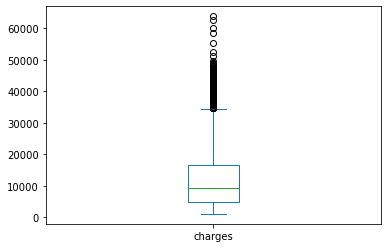

In [23]:
df["charges"].plot(kind="box")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

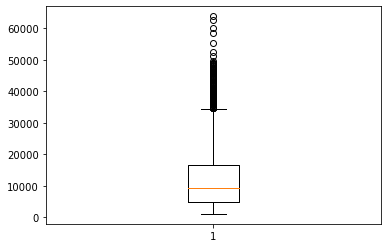

In [24]:
plt.boxplot(df.charges)
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

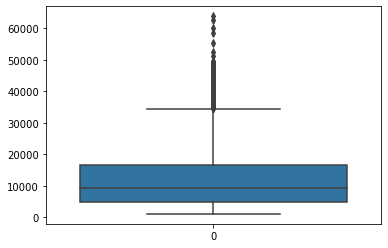

In [25]:
sns.boxplot(data=df["charges"],orient="v")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

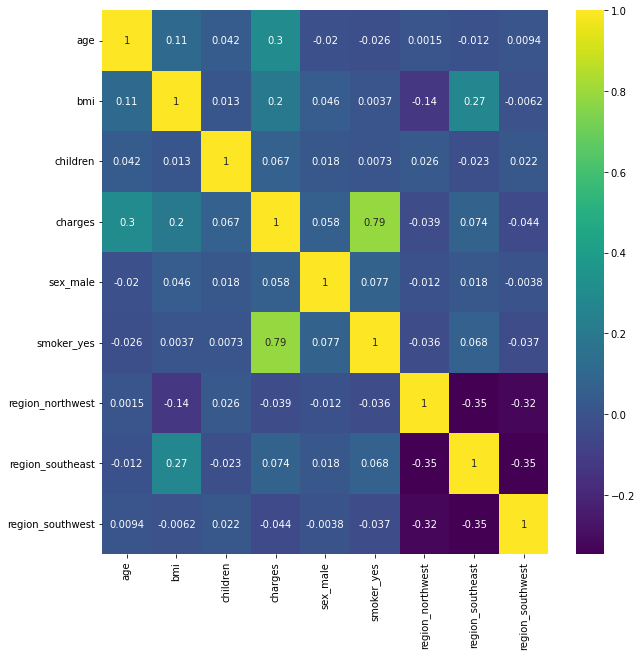

In [30]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g",cmap="viridis",cbar=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='charges', ylabel='Count'>

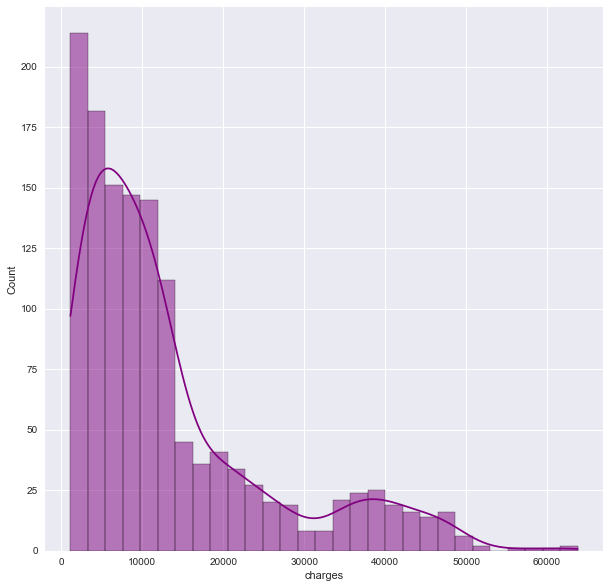

In [60]:
plt.style.use("seaborn")
fig,ax=plt.subplots(figsize=(10,10))
sns.histplot(x=df.charges,color="purple",kde=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='bmi', ylabel='Count'>

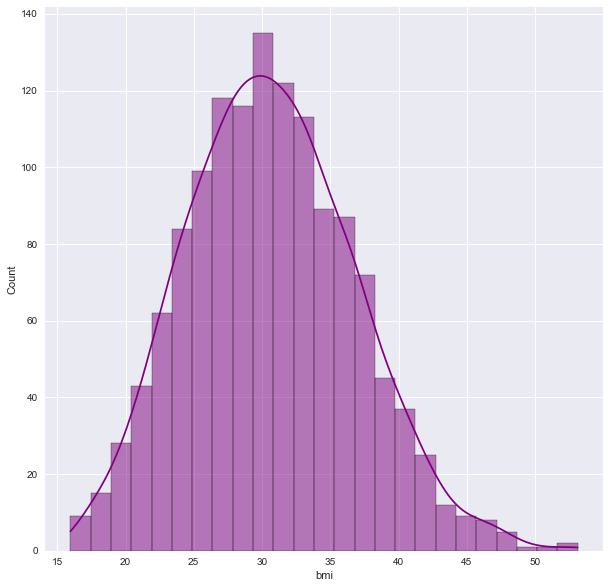

In [32]:
plt.style.use("seaborn")
fig,ax=plt.subplots(figsize=(10,10))
sns.histplot(x=df.bmi,color="purple",kde=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x=df.drop("charges",axis=1)
y=df.charges

In [36]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [38]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
435,60,33.110,3,1,0,0,1,0
202,60,24.035,0,0,0,1,0,0
1183,48,27.360,1,0,0,0,0,0
1291,19,34.900,0,1,1,0,0,1
773,19,28.880,0,0,1,1,0,0


In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
lr.score(x_train,y_train)

0.7486381659434201

In [44]:
lr.score(x_test,y_test)

0.7497814388540697

In [45]:
pred=lr.predict(x_test)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='charges', ylabel='Count'>

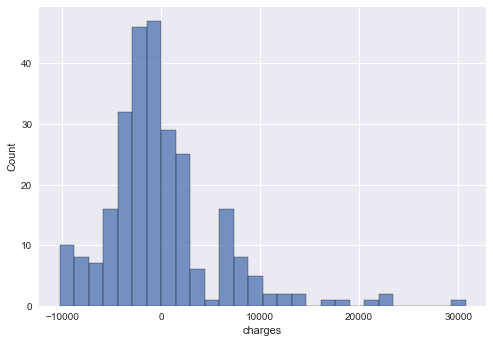

In [49]:
sns.histplot(y_test-pred)

<IPython.core.display.Javascript object>

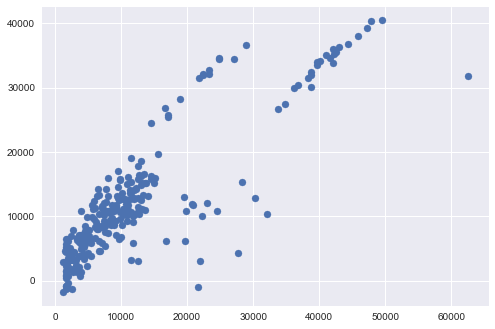

In [50]:
plt.scatter(y_test,pred)
plt.plot()

In [51]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [52]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [54]:
lr.predict([[19,27.900,0,0,1,0,0,1]])

array([25245.76135224])

In [55]:
import pickle as pk

In [56]:
with open("Linear_model.sav","wb") as file:
    pk.dump(lr,file)

In [58]:
with open("Linear_model.sav","rb") as file:
    model=pk.load(file)